<a href="https://colab.research.google.com/github/xalejandrow/interacting-with-the-twitter-api-project-tutorial/blob/main/Crimes_4GKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [ ]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [ ]:
# 3. Display some observations
df.sample(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
723394,723394,2019.0,Abril,2019-04-10 15:30:00,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-2,UI-1CD,BARRIO LA CONCEPCIÓN,COYOACAN,2019-04-13 20:05:17,Abril,2019,EUROPA,NaN,-99.155931,19.344140,"19.3441400125,-99.1559309818"
424967,424967,2018.0,Octubre,2018-10-10 19:30:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-2CD,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,2018-10-10 21:01:10,Octubre,2018,NORTE 3 Y BOULEVARD PUERTO AEREO,NaN,-99.094422,19.423589,"19.4235891347,-99.0944217478"
295540,295540,2017.0,Julio,2017-07-29 12:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-2CD,NaN,VENUSTIANO CARRANZA,2017-07-30 07:09:55,Julio,2017,CECILIO ROBELO,NOTIFICACION MEDICO LEGAL BALBUENA,NaN,NaN,NaN
514866,514866,2018.0,Marzo,2018-03-05 13:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-2CD,PROGRESO DEL SUR,IZTAPALAPA,2018-03-05 16:57:36,Marzo,2018,GANADEROS,CALLE COSECHAS,-99.112514,19.349975,"19.3499747944,-99.1125137233"
705399,705399,2015.0,Septiembre,2015-09-15 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-8,UI-3CD,SAN JUAN DE ARAGÓN I SECCIÓN,GUSTAVO A MADERO,2016-01-28 19:30:06,Enero,2016,CALLE 533,AV. 506,-99.089467,19.456502,"19.4565019998,-99.089467"
587793,587793,2017.0,Octubre,2017-10-29 02:00:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-2,UI-2CD,SAN NICOLÁS TOTOLAPAN,LA MAGDALENA CONTRERAS,2017-10-30 11:01:07,Octubre,2017,ANDADOR 2 DE SOLEDAD,NaN,-99.244315,19.297067,"19.2970673814,-99.2443150561"
633794,633794,2017.0,Noviembre,2017-11-11 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-6,UI-1SD,CENTRO,CUAUHTEMOC,2018-01-09 11:59:34,Enero,2018,ARTICULO 123,NaN,-99.145995,19.432693,"19.4326925729,-99.145994972"
129238,129238,2018.0,Octubre,2018-10-09 12:00:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-5,UI-2SD,SANTA CRUZ MEYEHUALCO,IZTAPALAPA,2018-12-12 17:28:23,Diciembre,2018,CALLE 63,ESQUINA CON AVENIDA 6,-99.045780,19.343038,"19.3430381178,-99.0457797296"
334414,334414,2018.0,Abril,2018-04-15 09:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75TER,3 S/D,ZENTLAPATL,CUAJIMALPA DE MORELOS,2018-04-19 15:25:13,Abril,2018,2DA CERRADA DE AVENIDA PUERTO MEXICO,NaN,-99.312258,19.351590,"19.3515903718,-99.3122579653"
473010,473010,2016.0,Octubre,2016-10-04 20:45:00,ROBO DE MOTOCICLETA CON VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN TLALPAN,TLP-3,UI-1CD,SAN BUENAVENTURA,TLALPAN,2016-10-05 00:13:31,Octubre,2016,TECORRAL,NaN,-99.160048,19.282385,"19.2823847373,-99.1600475775"


In [ ]:
# We want only the mayors from Ciudad de Mexico
lista = ['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO']
df = df[df['alcaldia_hechos'].isin(lista)]
df


,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [ ]:
df['alcaldia_hechos'].nunique()
df.alcaldia_hechos.nunique()

16

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800207 non-null  int64  
 1   ao_hechos             800021 non-null  float64
 2   mes_hechos            800021 non-null  object 
 3   fecha_hechos          800021 non-null  object 
 4   delito                800207 non-null  object 
 5   categoria_delito      800207 non-null  object 
 6   fiscalia              800207 non-null  object 
 7   agencia               800207 non-null  object 
 8   unidad_investigacion  799985 non-null  object 
 9   colonia_hechos        776763 non-null  object 
 10  alcaldia_hechos       800207 non-null  object 
 11  fecha_inicio          800207 non-null  object 
 12  mes_inicio            800207 non-null  object 
 13  ao_inicio             800207 non-null  int64  
 14  calle_hechos          798142 non-null  object 
 15  

In [ ]:
# Convert the values to the right type

df['fecha_hechos'] = df['fecha_hechos'].astype('datetime64')
df['fecha_inicio'] = df['fecha_inicio'].astype('datetime64')
#df['ao_hechos'] = df['ao_hechos'].astype(int) #no se puede porque tiene NaN

df['mes_hechos'] = pd.Categorical(df['mes_hechos'])
df['delito'] = pd.Categorical(df['delito'])
df['categoria_delito'] = pd.Categorical(df['categoria_delito'])
df['unidad_investigacion'] = pd.Categorical(df['unidad_investigacion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800207 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    800207 non-null  int64         
 1   ao_hechos             800021 non-null  float64       
 2   mes_hechos            800021 non-null  category      
 3   fecha_hechos          800021 non-null  datetime64[ns]
 4   delito                800207 non-null  category      
 5   categoria_delito      800207 non-null  category      
 6   fiscalia              800207 non-null  object        
 7   agencia               800207 non-null  object        
 8   unidad_investigacion  799985 non-null  category      
 9   colonia_hechos        776763 non-null  object        
 10  alcaldia_hechos       800207 non-null  object        
 11  fecha_inicio          800207 non-null  datetime64[ns]
 12  mes_inicio            800207 non-null  object        
 13 

In [ ]:
# Summarise the data, including dates
df.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,800207.000000,800021.000000,800021,800207,800207.000000,777531.000000,777531.000000
mean,404440.724969,2017.233964,2017-09-15 06:18:33.451072768,2017-11-08 17:23:31.065400576,2017.385711,-99.137482,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202177.500000,2016.000000,2016-11-28 10:30:00,2017-01-09 17:54:14,2017.000000,-99.174906,19.342264
50%,404476.000000,2017.000000,2017-10-27 11:30:00,2017-11-27 12:11:57,2017.000000,-99.142680,19.391685
75%,606686.500000,2018.000000,2018-08-25 13:00:00,2018-09-19 16:27:08.500000,2018.000000,-99.101421,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.946873,19.582490
std,233527.398708,1.412214,NaN,NaN,1.020460,0.058753,0.069692


In [ ]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes from {df["fecha_inicio"].min()} to {df["fecha_inicio"].max()}')

There are 800207 crimes from 2016-01-01 01:35:06 to 2019-06-30 23:56:29


In [ ]:
# How many crimes were recorded by year?
#data=df['ao_inicio'].value_counts(ascending=True)
df['ao_inicio'].value_counts()


2018    252510
2017    225854
2016    195849
2019    125994
Name: ao_inicio, dtype: int64

In [ ]:
# Show the top 5 crimes
#data.plot(kind='bar')
df.set_index('fecha_inicio',inplace=True)

In [ ]:
df_count=df.groupby(df.index.year).size().reset_index(name='obs')

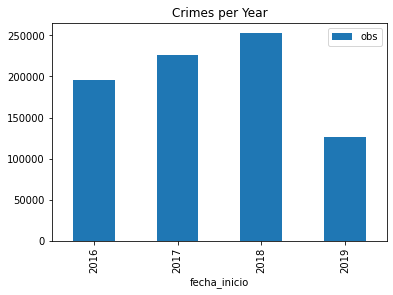

In [ ]:
df_count.plot.bar(title='Crimes per Year', x='fecha_inicio',y='obs')

In [ ]:
# Calculate the accumulated rate of the top 5 crimes

In [ ]:
# Which city has the most and the less crimes in the dataset?

In [ ]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?

In [ ]:
# Do you see a trend per month or day?